# Курсовой проэкт

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

Датасет был загружен с помощью keras.datasets.fashion_mnist, так как проэкт в дальнейшем проще загружать сокурсникам

In [4]:
fashion_mnist = keras.datasets.fashion_mnist



In [5]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [6]:
x_train.shape

(60000, 28, 28)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Метод для визуализации графика качества модели на валидационной выборке от количества эпох

Были истользованые мощности библиотеки keras метод history вместо tensorboard

In [5]:
def plot(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Все дальнейшие расчеты сделаный для 10 эпох

In [6]:
epochs = 10

# Логистическая регрессия

In [7]:
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

In [8]:
model_1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history_1 = model_1.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8174 - accuracy: 0.7425 - val_loss: 0.6538 - val_accuracy: 0.7792
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5908 - accuracy: 0.8077 - val_loss: 0.5807 - val_accuracy: 0.8071
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5420 - accuracy: 0.8221 - val_loss: 0.5496 - val_accuracy: 0.8150
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5155 - accuracy: 0.8282 - val_loss: 0.5333 - val_accuracy: 0.8187
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4985 - accuracy: 0.8335 - val_loss: 0.5190 - val_accuracy: 0.8230
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4858 - accuracy: 0.8364 - val_loss: 0.5094 - val_accuracy: 0.8265
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4760 - accuracy: 0.8401 - val_loss: 0.5004 - val_accuracy:

In [10]:
test_loss, test_acc = model_1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.4875 - accuracy: 0.8330


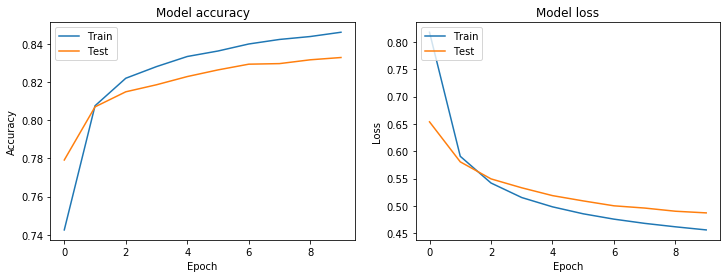

In [11]:
plot(history_1)

Даный алгоритм показал довольно неплохую зависимость между тестовой и тренировочной выборкой, что указыват на то, что модель не переучилась.Качество составило 0.8330

# Полносвязная нейронная сеть

In [12]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
model_2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


In [15]:
model_2.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_2 = model_2.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7600 - accuracy: 0.7446 - val_loss: 0.5384 - val_accuracy: 0.8147
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5204 - accuracy: 0.8204 - val_loss: 0.4716 - val_accuracy: 0.8371
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4640 - accuracy: 0.8375 - val_loss: 0.4397 - val_accuracy: 0.8443
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4314 - accuracy: 0.8477 - val_loss: 0.4201 - val_accuracy: 0.8496
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4096 - accuracy: 0.8548 - val_loss: 0.4063 - val_accuracy: 0.8522
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3904 - accuracy: 0.8607 - val_loss: 0.3919 - val_accuracy: 0.8590
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3759 - accuracy: 0.8660 - val_loss: 0.3848 - val_ac

In [17]:
test_loss, test_acc = model_2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3604 - accuracy: 0.8686


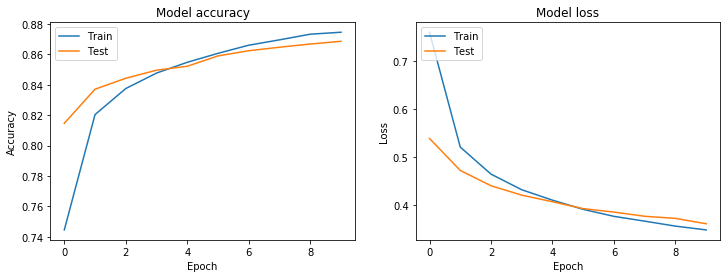

In [22]:
plot(history_2)

Модель со скрытыми слоями показала лучший результат качества нежели предыдущая модель, я именно 0.8686 против 0.8330

Так же можно наблюдать, что модель не переучилась( результат лучше, чем в предидущей модели)

# Сверточная нейронная сеть

In [18]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [19]:
model_3 = Sequential([
    Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(128, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])


model_3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.7387 - accuracy: 0.7393 - val_loss: 0.5369 - val_accuracy: 0.8075
Epoch 2/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.4782 - accuracy: 0.8313 - val_loss: 0.4595 - val_accuracy: 0.8399
Epoch 3/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.4210 - accuracy: 0.8517 - val_loss: 0.4290 - val_accuracy: 0.8507
Epoch 4/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.3865 - accuracy: 0.8643 - val_loss: 0.3864 - val_accuracy: 0.8683
Epoch 5/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3618 - accuracy: 0.8728 - val_loss: 0.3927 - val_accuracy: 0.8592
Epoch 6/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.3432 - accuracy: 0.8798 - val_loss: 0.3678 - val_accuracy: 0.8690
Epoch 7/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3286 - accuracy: 0.8844 - val_loss: 0.3366 -

In [20]:
test_loss, test_acc = model_3.evaluate(x_test,  y_test, verbose=2)

313/313 - 6s - loss: 0.3214 - accuracy: 0.8888


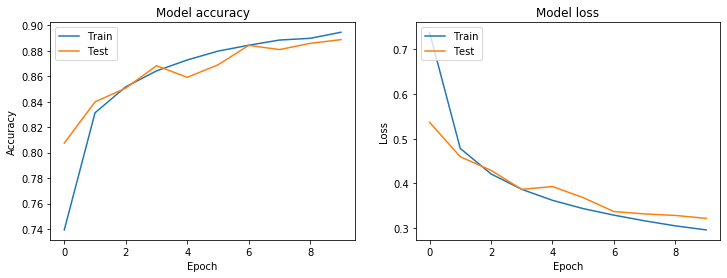

In [24]:
plot(history_3)

Сверточная нейронная сеть показала наилучший до этого результат по качеству( 0.8888), но присутствует шумы на графиках тестовой выборки

У следуйщей модели добавим количество слоев свертки

In [23]:
model_4 = Sequential([
    Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])


model_4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_4 = model_4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.9238 - accuracy: 0.6686 - val_loss: 0.6195 - val_accuracy: 0.7713
Epoch 2/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.5423 - accuracy: 0.7982 - val_loss: 0.5282 - val_accuracy: 0.8078
Epoch 3/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.4699 - accuracy: 0.8292 - val_loss: 0.4661 - val_accuracy: 0.8358
Epoch 4/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.4270 - accuracy: 0.8450 - val_loss: 0.4250 - val_accuracy: 0.8467
Epoch 5/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.3969 - accuracy: 0.8570 - val_loss: 0.4134 - val_accuracy: 0.8512
Epoch 6/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.3743 - accuracy: 0.8649 - val_loss: 0.3958 - val_accuracy: 0.8530
Epoch 7/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3573 - accuracy: 0.8707 - val_loss: 0.

In [25]:
test_loss, test_acc = model_4.evaluate(x_test,  y_test, verbose=2)

313/313 - 6s - loss: 0.3566 - accuracy: 0.8712


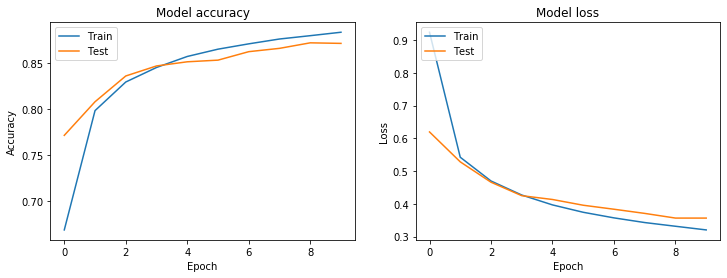

In [28]:
plot(history_4)

Можно увидеть довольно странный результат. Качество модели немного упало( 0.8712 против 0.8888), но зависимость на тестовой выборке стала намного лучше.

Тепер к предыдущей модели добавим слои пакетной нормализации(Batch Normalization)

In [26]:
model_5 = Sequential([
    Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(momentum=0.8),
    MaxPooling2D(),
    Conv2D(128, kernel_size=3, activation='relu'),
    BatchNormalization(momentum=0.8),
    MaxPooling2D(),
    Conv2D(128, kernel_size=3, activation='relu'),
    BatchNormalization(momentum=0.8),
    Flatten(),
    Dense(10, activation='softmax')
])


model_5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_5 = model_5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 196s 104ms/step - loss: 0.4092 - accuracy: 0.8539 - val_loss: 0.3432 - val_accuracy: 0.8731
Epoch 2/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.2834 - accuracy: 0.8973 - val_loss: 0.3148 - val_accuracy: 0.8917
Epoch 3/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.2436 - accuracy: 0.9106 - val_loss: 0.2948 - val_accuracy: 0.8946
Epoch 4/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.2145 - accuracy: 0.9217 - val_loss: 0.2752 - val_accuracy: 0.9057
Epoch 5/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.1928 - accuracy: 0.9297 - val_loss: 0.3063 - val_accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 186s 99ms/step - loss: 0.1703 - accuracy: 0.9387 - val_loss: 0.3281 - val_accuracy: 0.8862
Epoch 7/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.1531 - accuracy: 0.9452 - val_l

In [29]:
test_loss, test_acc = model_5.evaluate(x_test,  y_test, verbose=2)

313/313 - 7s - loss: 0.2831 - accuracy: 0.9076


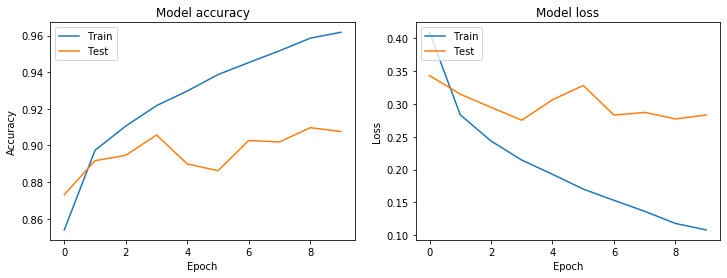

In [27]:
plot(history_5)

Как и говорилось в описании Итогового проэкта, Batch Normalization улучшают качество модели, так и получилось. Но с другой стороны, наша модель переобучилась и на тестовой выборке показала плохой результат.

В целом наилучший результат для даных параметров зарачи показала 4 модель, хотя и не имеет самое высокое качество, но при условии, что скорость вычисления не важна.